In [142]:
from scipy import stats
def avaliar_corr(df, coluna_base):

    corr_df = pd.DataFrame(columns = ["r", "p"])

    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            r, p = stats.pearsonr(df[coluna_base], df[col])
            corr_df.loc[col] = [round(r,4), p ]
    
    return corr_df

# COVID 2019 

In [160]:
import pandas as pd
import seaborn as sns
df_arr_mun = pd.read_csv("../data/integrado/arr_mun.csv")

In [144]:
#Carregando dados da COVID
file1 = "../data/dados_covid/HIST_PAINEL_COVIDBR_2020_Parte1_15set2022.csv"
file2 = "../data/dados_covid/HIST_PAINEL_COVIDBR_2020_Parte2_15set2022.csv"
files_covid = [file1, file2]

lista_df = [pd.read_csv(file, sep=";") for file in files_covid]
df_covid = pd.concat(lista_df)

In [145]:
df_covid

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859702,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-27,53,3015268.0,248543,615,4201,3,NaN,NaN,1.0
859703,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-28,53,3015268.0,249736,1193,4223,22,NaN,NaN,1.0
859704,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-29,53,3015268.0,250457,721,4241,18,NaN,NaN,1.0
859705,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-30,53,3015268.0,251135,678,4248,7,NaN,NaN,1.0


In [146]:
df_covid = df_covid[df_covid["municipio"].notna()]

In [147]:
df_covid_data = df_covid[df_covid["data"]=="2020-03-28"]

In [148]:
#Carregando df de custo de probabilidades
df_custos_sp = pd.read_csv("data/custos_sp.csv")
df_municipio = pd.read_csv("../data/integrado/municipio.csv")
df_municipio = df_municipio[df_municipio.pais == "BRA"]

In [149]:
df_municipio["cod_mun_cut"] =  df_municipio["cod_mun"] // 10

df_analise_cov = df_covid_data.merge(
    df_municipio[["cod_mun_cut", "cod_arranjo"]],
    how='right', 
    left_on=["codmun"], 
    right_on=["cod_mun_cut"]
    )

In [150]:
df_analise_cov = df_analise_cov.groupby("cod_arranjo")[["casosAcumulado"]].sum()

In [ ]:
df_chi_custo_uf = df_chi_custo.groupby(["cod_uf"])[["2014", "2015", "2016", "totalCost"]].sum()

### Analise com custo do caminho

In [151]:
df_cov_custo = df_analise_cov.merge(
    df_custos_sp,
    how='right', 
    left_on=["cod_arranjo"], 
    right_on=["cod_mun_destino"]
    )

In [152]:
#Fazendo merge com df de arr_mun
df_cov_custo = df_cov_custo.merge(
    df_arr_mun,
    how='left', 
    left_on=["cod_mun_destino"], 
    right_on=["cod_cidade"]
    )

In [153]:
df_cov_custo["totalCost"] = abs(df_cov_custo["totalCost"])

In [157]:
#Removendo a cidade de origem - São Paulo (3550308)
df_cov_custo = df_cov_custo[df_cov_custo["cod_cidade"]!=3550308]

In [162]:
#Calculando por uf
df_cov_custo_uf = df_cov_custo.groupby(["cod_uf"])[["casosAcumulado", "totalCost"]].sum()

### Avaliando correlações

In [159]:
#Por cidade
print("Person")
print(df_cov_custo[["casosAcumulado","totalCost"]].corr(method ='pearson'))
print(" ")
print("Spearman")
print(df_cov_custo[["casosAcumulado","totalCost"]].corr(method ='spearman'))

Person
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.846958
totalCost             0.846958   1.000000
 
Spearman
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.251198
totalCost             0.251198   1.000000


<AxesSubplot: xlabel='casosAcumulado', ylabel='totalCost'>

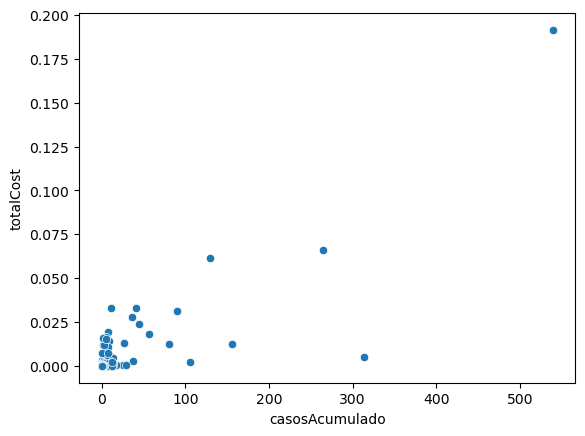

In [161]:
sns.scatterplot(data=df_cov_custo, x="casosAcumulado", y="totalCost")

In [166]:
#Por estado
print("Person")
print(df_cov_custo_uf.corr(method ='pearson'))
print(" ")
print("Spearman")
print(df_cov_custo_uf.corr(method ='spearman'))

Person
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.722087
totalCost             0.722087   1.000000
 
Spearman
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.798412
totalCost             0.798412   1.000000


<AxesSubplot: xlabel='casosAcumulado', ylabel='totalCost'>

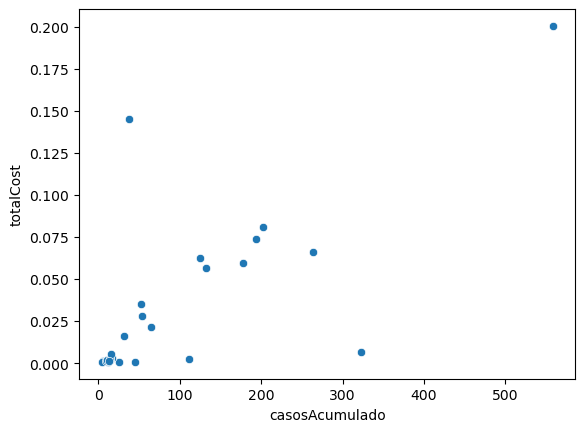

In [163]:
#plot
sns.scatterplot(data=df_cov_custo_uf, x="casosAcumulado", y="totalCost")


## Fazendo uma analize mais qualitativa

### Top 20

In [200]:
df_qual_top20 = df_cov_custo.sort_values(by='casosAcumulado', ascending=False)[:20]

In [201]:
print("Person")
print(df_qual_top20[["casosAcumulado","totalCost"]].corr(method ='pearson'))
print(" ")
print("Spearman")
print(df_qual_top20[["casosAcumulado","totalCost"]].corr(method ='spearman'))

Person
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.818608
totalCost             0.818608   1.000000
 
Spearman
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.681459
totalCost             0.681459   1.000000


<AxesSubplot: xlabel='casosAcumulado', ylabel='totalCost'>

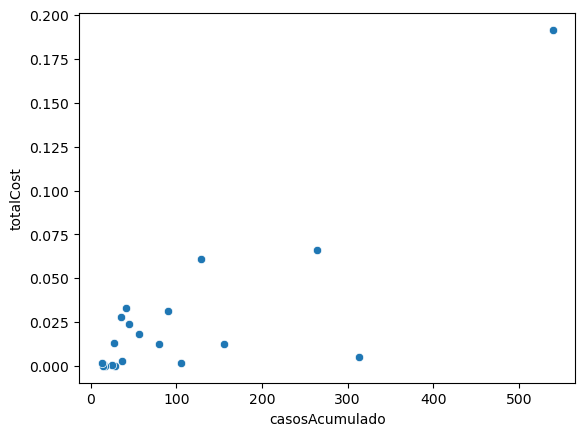

In [173]:
sns.scatterplot(data=df_qual_top20, x="casosAcumulado", y="totalCost")

In [182]:
#Fazer pra sperman: TODO
avaliar_corr(df_qual_top20[["casosAcumulado","totalCost"]], "casosAcumulado")

,r,p
casosAcumulado,1.0000,0.00000
totalCost,0.8186,0.00001


### Top 10

In [179]:
df_qual_top10 = df_cov_custo.sort_values(by='casosAcumulado', ascending=False)[:10]

In [180]:
print("Person")
print(df_qual_top10[["casosAcumulado","totalCost"]].corr(method ='pearson'))
print(" ")
print("Spearman")
print(df_qual_top10[["casosAcumulado","totalCost"]].corr(method ='spearman'))

Person
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.796947
totalCost             0.796947   1.000000
 
Spearman
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.260606
totalCost             0.260606   1.000000


<AxesSubplot: xlabel='casosAcumulado', ylabel='totalCost'>

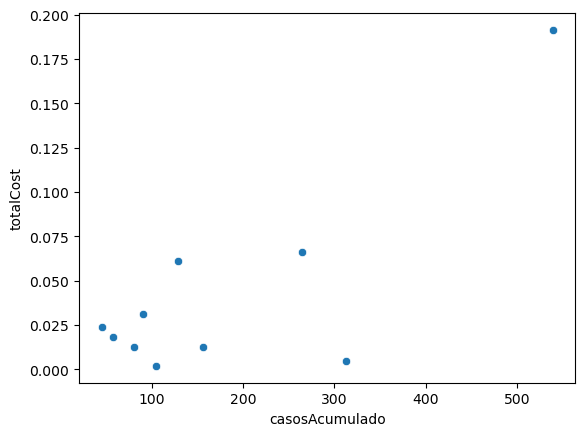

In [181]:
sns.scatterplot(data=df_qual_top10, x="casosAcumulado", y="totalCost")

In [183]:
df_qual_top10

,casosAcumulado,index,cod_mun_origem,cod_mun_destino,totalCost,cod_nos,costs,cod_cidade,nome_cidade,populacao_2021,area,latitude,longitude,cod_uf,nome_uf,uf,pais,densidade_2021
4690,539,0,3550308,3304557,0.191450,"[3550308,3304557]","[-1.0,-0.1914498118571103]",3304557,Arranjo Populacional de Rio de Janeiro/RJ,12901184.0,6044.771,-22.91290,-43.2003,33,Rio de Janeiro,RJ,BRA,2134.271753
4577,313,0,3550308,2304400,0.004949,"[3550308,3304557,2304400]","[-1.0,-0.1914498118571103,-0.0049494339014691255]",2304400,Arranjo Populacional de Fortaleza/CE,3695896.0,3070.151,-3.71664,-38.5423,23,Ceará,CE,BRA,1203.815708
4529,264,0,3550308,5300108,0.065940,"[3550308,5300108]","[-1.0,-0.0659403561218135]",5300108,Arranjo Populacional de Brasília/DF,4104786.0,17203.952,-15.77950,-47.9297,53,Distrito Federal,DF,BRA,238.595527
4522,156,0,3550308,3106200,0.012537,"[3550308,3106200]","[-1.0,-0.012537039811135573]",3106200,Arranjo Populacional de Belo Horizonte/MG,5273131.0,5517.560,-19.91020,-43.9266,31,Minas Gerais,MG,BRA,955.699802
4677,129,0,3550308,4314902,0.061256,"[3550308,4314902]","[-1.0,-0.06125579900203264]",4314902,Arranjo Populacional de Porto Alegre/RS,4014049.0,5798.121,-30.03180,-51.2065,43,Rio Grande do Sul,RS,BRA,692.301696
2341,105,0,3550308,1302603,0.001960,"[3550308,5300108,1302603]","[-1.0,-0.0659403561218135,-0.001960298918713569]",1302603,Manaus,2255903.0,11401.092,-3.11866,-60.0212,13,Amazonas,AM,BRA,197.867274
4694,90,0,3550308,2927408,0.031363,"[3550308,2927408]","[-1.0,-0.03136335439708387]",2927408,Arranjo Populacional de Salvador/BA,3877453.0,3617.664,-12.97180,-38.5011,29,Bahia,BA,BRA,1071.811257
4570,80,0,3550308,4106902,0.012388,"[3550308,4106902]","[-1.0,-0.012387604752572046]",4106902,Arranjo Populacional de Curitiba/PR,3542615.0,7872.808,-25.41950,-49.2646,41,Paraná,PR,BRA,449.981125
4685,57,0,3550308,2611606,0.018314,"[3550308,2611606]","[-1.0,-0.01831446288412837]",2611606,Arranjo Populacional de Recife/PE,4104434.0,3033.915,-8.04666,-34.8771,26,Pernambuco,PE,BRA,1352.850690
4751,45,0,3550308,3205309,0.023796,"[3550308,3205309]","[-1.0,-0.023795518633050128]",3205309,Arranjo Populacional de Vitória/ES,1904563.0,1733.830,-20.31550,-40.3128,32,Espirito Santo,ES,BRA,1098.471592


## Casos Iniciais - dataset mais limitado

In [ ]:
df_covid_inicial = pd.read_csv("data/brazil_covid19.csv")

In [ ]:
df_covid_inicial.head(50)

,date,region,state,cases,deaths
0,2020-02-25,Centro-Oeste,DF,0.0,0
1,2020-02-25,Centro-Oeste,GO,0.0,0
2,2020-02-25,Centro-Oeste,MS,0.0,0
3,2020-02-25,Centro-Oeste,MT,0.0,0
4,2020-02-25,Nordeste,AL,0.0,0
5,2020-02-25,Nordeste,BA,0.0,0
6,2020-02-25,Nordeste,CE,0.0,0
7,2020-02-25,Nordeste,MA,0.0,0
8,2020-02-25,Nordeste,PB,0.0,0
9,2020-02-25,Nordeste,PE,0.0,0


In [ ]:
df_semana_1 = df_covid_inicial[df_covid_inicial.date=="2020-03-15"]

In [ ]:
df_semana_1

,date,region,state,cases,deaths
513,2020-03-15,Centro-Oeste,DF,8.0,0
514,2020-03-15,Centro-Oeste,GO,3.0,0
515,2020-03-15,Centro-Oeste,MS,0.0,0
516,2020-03-15,Centro-Oeste,MT,0.0,0
517,2020-03-15,Nordeste,AL,1.0,0
518,2020-03-15,Nordeste,BA,2.0,0
519,2020-03-15,Nordeste,CE,0.0,0
520,2020-03-15,Nordeste,MA,0.0,0
521,2020-03-15,Nordeste,PB,0.0,0
522,2020-03-15,Nordeste,PE,2.0,0


In [ ]:
df_teste_uf2 = df_teste.groupby(['coduf', 'estado'])[["casosAcumulado","totalCost"]].sum()

In [ ]:
df_teste_uf2

,,casosAcumulado,totalCost
coduf,estado,,
11,RO,6,0.001102
12,AC,25,0.000907
13,AM,111,0.002177
14,RR,12,0.000763
15,PA,13,0.003119
16,AP,4,0.000731
17,TO,9,0.001404
21,MA,14,0.002112
22,PI,11,0.002079


## Testando significancia

In [ ]:
df_res = avaliar_corr(df_teste2[["totalCost", "casosAcumulado"]], "casosAcumulado")
df_res

,r,p
totalCost,0.8314,0.0
casosAcumulado,1.0000,0.0


In [ ]:
df_res = avaliar_corr(df_teste_uf[["totalCost", "casosAcumulado"]], "casosAcumulado")
df_res


,r,p
totalCost,0.6952,0.000057
casosAcumulado,1.0000,0.000000


# Chicungunya 2014

In [13]:
import pandas as pd
df_arr_mun = pd.read_csv("../data/integrado/arr_mun.csv")

In [3]:
#Lendo casos chicungunya no Brasil
df_chi = pd.read_csv("data/chicugunya_series.csv", sep=";")
df_chi.drop(df_chi.index[2791:], inplace=True)
df_chi_anos = df_chi[["2014", "2015", "2016"]]._convert(numeric=True)
df_chi = pd.concat([df_chi["Munic�pio de resid�ncia"],df_chi_anos], axis = 1)
df_chi = df_chi.fillna(0)


In [4]:
df_custos_fs = pd.read_csv("data/custos_fs.csv")
df_municipio = pd.read_csv("../data/integrado/municipio.csv")
df_municipio = df_municipio[df_municipio.pais == "BRA"]

In [5]:
def getCodMunicipio(texto):
    codigo = texto.split()[0]
    return int(codigo)

df_chi["cod_cidade"] = df_chi["Munic�pio de resid�ncia"].apply(getCodMunicipio)

In [12]:
df_municipio

,cod_mun,nome_mun,latitude,longitude,cod_uf,populacao_2011,populacao_2021,area,densidade_2021,cod_reg_saude,nome_uf,uf,pais,cod_arranjo,cod_mun_cut
0,5200050,Abadia de Goiás,-16.75730,-49.4412,52,7023.0,9158.0,143.357,63.882475,52001.0,Goiás,GO,BRA,5208707,520005
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,31,6724.0,7022.0,880.461,7.975367,31074.0,Minas Gerais,MG,BRA,3100104,310010
2,5200100,Abadiânia,-16.19700,-48.7057,52,16088.0,20873.0,1044.555,19.982672,52011.0,Goiás,GO,BRA,5200100,520010
3,3100203,Abaeté,-19.15510,-45.4444,31,22716.0,23263.0,1817.067,12.802500,31024.0,Minas Gerais,MG,BRA,3100203,310020
4,1500107,Abaetetuba,-1.72183,-48.8788,15,142785.0,160439.0,1610.654,99.611090,15011.0,Pará,PA,BRA,1500107,150010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,2933604,Xique-Xique,-10.82300,-42.7245,29,45599.0,46562.0,5079.662,9.166358,29010.0,Bahia,BA,BRA,2933604,293360
5566,2517407,Zabelê,-8.07901,-37.1057,25,2093.0,2269.0,106.811,21.243130,25005.0,Paraíba,PB,BRA,2517407,251740
5567,3557154,Zacarias,-21.05060,-50.0552,35,2365.0,2784.0,319.056,8.725741,35156.0,São Paulo,SP,BRA,3557154,355715
5568,2114007,Zé Doca,-3.27014,-45.6553,21,51615.0,52190.0,2140.109,24.386608,21019.0,Maranhão,MA,BRA,2114007,211400


In [6]:
df_municipio["cod_mun_cut"] =  df_municipio["cod_mun"] // 10

df_analise_chi = df_chi.merge(
    df_municipio[["cod_mun_cut", "cod_arranjo"]],
    how='right', 
    left_on=["cod_cidade"], 
    right_on=["cod_mun_cut"]
    )

In [8]:
df_analise_chi = df_analise_chi.groupby("cod_arranjo")[["2014", "2015", "2016"]].sum()

### Analise com custo do caminho

In [9]:
df_chi_custo = df_analise_chi.merge(
    df_custos_fs,
    how='right', 
    left_on=["cod_arranjo"], 
    right_on=["cod_mun_destino"]
    )

In [10]:
df_chi_custo["2014"] = df_chi_custo["2014"].fillna(0)
df_chi_custo["2015"] = df_chi_custo["2015"].fillna(0)
df_chi_custo["2016"] = df_chi_custo["2016"].fillna(0)

In [16]:
#Fazendo merge com df de arr_mun
df_chi_custo = df_chi_custo.merge(
    df_arr_mun,
    how='left', 
    left_on=["cod_mun_destino"], 
    right_on=["cod_cidade"]
    )

In [22]:
df_chi_custo["totalCost"] = abs(df_chi_custo["totalCost"])

In [42]:
#Removendo a cidade de origem - Feira de Santana (2910800)
df_chi_custo = df_chi_custo[df_chi_custo["cod_cidade"]!=2910800]

In [43]:
df_chi_custo_uf = df_chi_custo.groupby(["cod_uf"])[["2014", "2015", "2016", "totalCost"]].sum()

### Avaliando correlações

In [44]:
#Por cidade
print("Person")
print(df_chi_custo[["2014","totalCost"]].corr(method ='pearson'))
print(" ")
print("Spearman")
print(df_chi_custo[["2014","totalCost"]].corr(method ='spearman'))

Person
               2014  totalCost
2014       1.000000   0.136519
totalCost  0.136519   1.000000
 
Spearman
               2014  totalCost
2014       1.000000   0.101555
totalCost  0.101555   1.000000


In [45]:
#Por cidade
print("Person")
print(df_chi_custo[["2015","totalCost"]].corr(method ='pearson'))
print(" ")
print("Spearman")
print(df_chi_custo[["2015","totalCost"]].corr(method ='spearman'))

Person
               2015  totalCost
2015       1.000000   0.419847
totalCost  0.419847   1.000000
 
Spearman
               2015  totalCost
2015       1.000000   0.092972
totalCost  0.092972   1.000000


In [46]:
#Por cidade
print("Person")
print(df_chi_custo[["2016","totalCost"]].corr(method ='pearson'))
print(" ")
print("Spearman")
print(df_chi_custo[["2016","totalCost"]].corr(method ='spearman'))

Person
               2016  totalCost
2016       1.000000   0.369686
totalCost  0.369686   1.000000
 
Spearman
               2016  totalCost
2016       1.000000   0.224107
totalCost  0.224107   1.000000


In [47]:
#Por estado
print("Person")
print(df_chi_custo_uf[["2014","totalCost"]].corr(method ='pearson'))
print(" ")
print("Spearman")
print(df_chi_custo_uf[["2014","totalCost"]].corr(method ='spearman'))

Person
               2014  totalCost
2014       1.000000  -0.023899
totalCost -0.023899   1.000000
 
Spearman
               2014  totalCost
2014       1.000000   0.210559
totalCost  0.210559   1.000000


In [54]:
#Por estado
print("Person")
print(df_chi_custo_uf[["2015","totalCost"]].corr(method ='pearson'))
print(" ")
print("Spearman")
print(df_chi_custo_uf[["2015","totalCost"]].corr(method ='kendall'))

Person
              2015  totalCost
2015       1.00000    0.19576
totalCost  0.19576    1.00000
 
Spearman
               2015  totalCost
2015       1.000000   0.486904
totalCost  0.486904   1.000000


<AxesSubplot: xlabel='2015', ylabel='totalCost'>

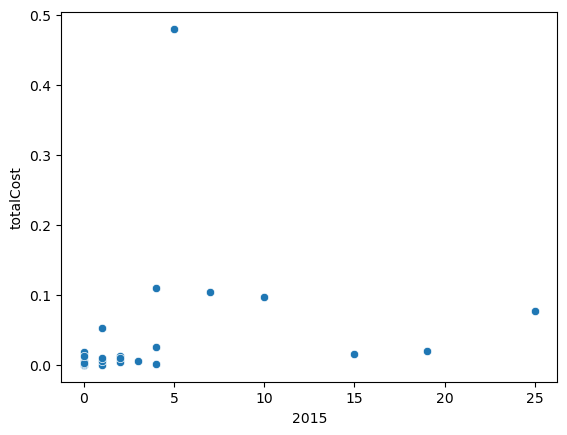

In [49]:
import seaborn as sns
sns.scatterplot(data=df_chi_custo_uf, x="2015", y="totalCost")


In [263]:
#Por estado
print("Person")
print(df_chi_custo_uf[["2016","totalCost"]].corr(method ='pearson'))
print(" ")
print("Spearman")
print(df_chi_custo_uf[["2016","totalCost"]].corr(method ='spearman'))

Person


KeyError: "['2016'] not in index"

<AxesSubplot: xlabel='2016', ylabel='totalCost'>

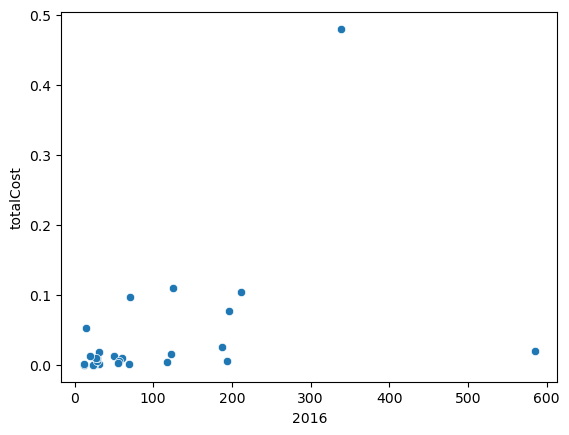

In [51]:
import seaborn as sns
sns.scatterplot(data=df_chi_custo_uf, x="2016", y="totalCost")

# Superspreader cities

In [242]:
#Analisar o caso de São Paulo
df_spread_sp = pd.read_csv("data/calc_SI_3550308.csv")
df_spread_sp['cod_cidade_cut'] = df_spread_sp['cod_cidade'] // 10


In [185]:
df_dia30 = df_covid[df_covid["data"]=="2020-03-28"]
df_dia60 = df_covid[df_covid["data"]=="2020-04-28"]

In [186]:
df_analise30 = df_spread_sp.merge(
    df_dia30,
    how='inner', 
    left_on=["cod_cidade"], 
    right_on=["codmun"]
    )

In [187]:
df_analise60 = df_spread_sp.merge(
    df_dia60,
    how='inner', 
    left_on=["cod_cidade"], 
    right_on=["codmun"]
    )

In [188]:
df_res = avaliar_corr(df_analise30[["dia_29", "casosAcumulado"]], "casosAcumulado")
df_res

,r,p
dia_29,0.8683,0.0
casosAcumulado,1.0000,0.0


In [189]:
df_analise30[["dia_29", "casosAcumulado"]].corr('spearman')

,dia_29,casosAcumulado
dia_29,1.00000,0.23636
casosAcumulado,0.23636,1.00000


In [190]:
df_res = avaliar_corr(df_analise60[["dia_59", "casosAcumulado"]], "casosAcumulado")
df_res

,r,p
dia_59,0.8595,0.0
casosAcumulado,1.0000,0.0


In [191]:
df_analise60[["dia_59", "casosAcumulado"]].corr('spearman')

,dia_59,casosAcumulado
dia_59,1.000000,0.313436
casosAcumulado,0.313436,1.000000


In [192]:
#Não acho que essa avaliacao seja boa
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
print("\tExplained variance:", explained_variance_score(df_analise30["dia_29"], df_analise30["casosAcumulado"]))
print("\tMean absolute error:", mean_absolute_error(df_analise30["dia_29"], df_analise30["casosAcumulado"]))
print("\tR2 score:", r2_score(df_analise30["dia_29"], df_analise30["casosAcumulado"]))

	Explained variance: -38.86138684293594
	Mean absolute error: 0.6594498009402003
	R2 score: -38.92271935917616


# Analise de maiores cidades com espalhamento

In [224]:
df_covid_inicial = pd.read_csv("data/brazil_covid19.csv")
df_arr_mun = pd.read_csv("../data/integrado/arr_mun.csv")

In [243]:
#Fazendo merge para deteminar estados de cada cidade
df_spread_sp = df_spread_sp.merge(
    df_arr_mun[["cod_cidade", "uf"]],
    how='left', 
    left_on=["cod_cidade"], 
    right_on=["cod_cidade"]
    )

In [271]:
df_model= df_spread_sp[["nome_cidade", "dia_0", "dia_9", "dia_19", "dia_29", "dia_59", "uf"]]
df_model_uf = (df_model.groupby("uf")[[ "dia_0", "dia_9", "dia_19", "dia_29", "dia_59"]].sum()).reset_index()

In [272]:
df_dia_1_real = pd.DataFrame(df_covid_inicial[df_covid_inicial.date=="2020-02-27"])

df_dia_1_merge = df_dia_1_real.merge(
    df_model_uf[["uf", "dia_0"]],
    how='left', 
    left_on=["state"], 
    right_on=["uf"]
    )

print("Spearman")
print(df_dia_1_merge[["cases","dia_0"]].corr(method ='spearman'))

Spearman
       cases  dia_0
cases    1.0    1.0
dia_0    1.0    1.0


In [274]:
df_dia_10_real = pd.DataFrame(df_covid_inicial[df_covid_inicial.date=="2020-03-08"])

df_dia_10_merge = df_dia_10_real.merge(
    df_model_uf[["uf", "dia_9"]],
    how='left', 
    left_on=["state"], 
    right_on=["uf"]
    )

print("Spearman")
print(df_dia_10_merge[["cases","dia_9"]].corr(method ='spearman'))

Spearman
          cases     dia_9
cases  1.000000  0.629368
dia_9  0.629368  1.000000


In [275]:
df_dia_20_real = pd.DataFrame(df_covid_inicial[df_covid_inicial.date=="2020-03-18"])

df_dia_20_merge = df_dia_20_real.merge(
    df_model_uf[["uf", "dia_19"]],
    how='left', 
    left_on=["state"], 
    right_on=["uf"]
    )

print("Spearman")
print(df_dia_20_merge[["cases","dia_19"]].corr(method ='spearman'))

Spearman
           cases    dia_19
cases   1.000000  0.889379
dia_19  0.889379  1.000000


In [276]:
df_dia_30_real = pd.DataFrame(df_covid_inicial[df_covid_inicial.date=="2020-03-28"])

df_dia_30_merge = df_dia_30_real.merge(
    df_model_uf[["uf", "dia_29"]],
    how='left', 
    left_on=["state"], 
    right_on=["uf"]
    )

print("Spearman")
print(df_dia_30_merge[["cases","dia_29"]].corr(method ='spearman'))

Spearman
           cases    dia_29
cases   1.000000  0.795968
dia_29  0.795968  1.000000


In [277]:
df_dia_60_real = pd.DataFrame(df_covid_inicial[df_covid_inicial.date=="2020-04-28"])

df_dia_60_merge = df_dia_60_real.merge(
    df_model_uf[["uf", "dia_59"]],
    how='left', 
    left_on=["state"], 
    right_on=["uf"]
    )

print("Spearman")
print(df_dia_60_merge[["cases","dia_59"]].corr(method ='spearman'))

Spearman
           cases    dia_59
cases   1.000000  0.456654
dia_59  0.456654  1.000000
